**KERAS** is a neural network library which help in developing and evaluating deep learning models. Kers provide high-level API and is built on integration with tensorflow.
So downloading tensorflow downloads keras altogether.

# DATA PREPRATION AND PROCESSING

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels=[]
train_samples=[]

**Example data**

1. An experimental drug is tested on individuals from age 13 to 100 in clinical trial.

2. Trail had 4200 participants. Half under 65 and half above.
3. 95% above 65 had a side effect.
4. 95% below 65 had no side effects.

In [4]:
#generate data
#1 faced side effect 0 no side effect
for i in range(50):
  #5% below 65 who faced side effect
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  #5% above 65 without side effect
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  #95% below 65 who faced side effect
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  #95% above 65 without side effect
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)


In [5]:
#convert vector to numpy array
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)      #to prevent any oreder if made during data generation

In [6]:
#scale down data (13-100) to (0-1)    #eariler we did this by divding with 255.0 for images 
#reshaped since fit trainsform accepts like this
# -1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis. E.g,
# If you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).

scalar=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scalar.fit_transform(train_samples.reshape(-1,1))

In [7]:
#checking
for i in range(5):
  print(scaled_train_samples[i],train_samples[i])

[0.63218391] 68
[0.82758621] 85
[0.05747126] 18
[0.62068966] 67
[0.36781609] 45


In [8]:
print(scaled_train_samples.shape)

(2100, 1)


#Simple Keras Sequential Model

In [9]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [10]:
#choice of number of nodes is random.
model=Sequential([
          Dense(units=16,input_shape=(1,),activation='relu'),
          Dense(units=32,activation='relu'),
          Dense(units=2,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile specifies detials like optimizer,loss and metrics to define model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
#model fit is training the data

#you may see model not running on full data
# IMPORTANT :-
# The number total_count/32(132 here) shown during fitting the model is not the training samples; it is the number of batches.
# model.fit includes an optional argument batch_size, which, according to the documentation:
# If unspecified, batch_size will default to 32.
#keep batch_size more so that model runs faster.

#verbose=0 no details to show, 2 show full details (0,1,2 allowed values)

#more number of epoches better is the accuracy
#more number of running this model more better is accuracy, since fit starts from point it left last time.


model.fit(x=scaled_train_samples,y=train_labels,epochs=50,verbose=2)

Epoch 1/50
66/66 - 14s - loss: 0.6797 - accuracy: 0.4948
Epoch 2/50
66/66 - 0s - loss: 0.5695 - accuracy: 0.7386
Epoch 3/50
66/66 - 0s - loss: 0.4634 - accuracy: 0.8371
Epoch 4/50
66/66 - 0s - loss: 0.3686 - accuracy: 0.9029
Epoch 5/50
66/66 - 0s - loss: 0.3081 - accuracy: 0.9271
Epoch 6/50
66/66 - 0s - loss: 0.2765 - accuracy: 0.9333
Epoch 7/50
66/66 - 0s - loss: 0.2627 - accuracy: 0.9395
Epoch 8/50
66/66 - 0s - loss: 0.2564 - accuracy: 0.9386
Epoch 9/50
66/66 - 0s - loss: 0.2509 - accuracy: 0.9410
Epoch 10/50
66/66 - 0s - loss: 0.2475 - accuracy: 0.9433
Epoch 11/50
66/66 - 0s - loss: 0.2463 - accuracy: 0.9419
Epoch 12/50
66/66 - 0s - loss: 0.2440 - accuracy: 0.9452
Epoch 13/50
66/66 - 0s - loss: 0.2422 - accuracy: 0.9433
Epoch 14/50
66/66 - 0s - loss: 0.2409 - accuracy: 0.9452
Epoch 15/50
66/66 - 0s - loss: 0.2402 - accuracy: 0.9443
Epoch 16/50
66/66 - 0s - loss: 0.2399 - accuracy: 0.9448
Epoch 17/50
66/66 - 0s - loss: 0.2395 - accuracy: 0.9467
Epoch 18/50
66/66 - 0s - loss: 0.2387 -

## Validating Model

validation dataset is used to see if model is generalized for other data too.
Validation is usually part of data taken from training data. Model only learns from training data. 
**To see model accuracy see validation accuracy.**

1. can have seperate validation data
2. or can use validation_split=x to have x fraction of training data for validation, x between 0 to 1


In [14]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,epochs=50,verbose=2)

Epoch 1/50
60/60 - 1s - loss: 0.2200 - accuracy: 0.9481 - val_loss: 0.2188 - val_accuracy: 0.9333
Epoch 2/50
60/60 - 0s - loss: 0.2191 - accuracy: 0.9460 - val_loss: 0.2166 - val_accuracy: 0.9333
Epoch 3/50
60/60 - 0s - loss: 0.2192 - accuracy: 0.9466 - val_loss: 0.2184 - val_accuracy: 0.9333
Epoch 4/50
60/60 - 0s - loss: 0.2186 - accuracy: 0.9460 - val_loss: 0.2188 - val_accuracy: 0.9333
Epoch 5/50
60/60 - 0s - loss: 0.2179 - accuracy: 0.9487 - val_loss: 0.2235 - val_accuracy: 0.9333
Epoch 6/50
60/60 - 0s - loss: 0.2181 - accuracy: 0.9450 - val_loss: 0.2206 - val_accuracy: 0.9333
Epoch 7/50
60/60 - 0s - loss: 0.2184 - accuracy: 0.9450 - val_loss: 0.2165 - val_accuracy: 0.9333
Epoch 8/50
60/60 - 0s - loss: 0.2165 - accuracy: 0.9481 - val_loss: 0.2145 - val_accuracy: 0.9333
Epoch 9/50
60/60 - 0s - loss: 0.2160 - accuracy: 0.9466 - val_loss: 0.2142 - val_accuracy: 0.9333
Epoch 10/50
60/60 - 0s - loss: 0.2166 - accuracy: 0.9466 - val_loss: 0.2170 - val_accuracy: 0.9333
Epoch 11/50
60/60 -

**If accuracy and validation-accuracy are nearly equal then model is fine, if val-accuracy is quite low then accuracy then there can be either underfitting or overfitting. If on running more epoches val-accuracy not improves so overfitting is the problem**

# Testing

In [18]:
#generating test data
test_labels=[]
test_samples=[]

In [19]:
#generate test data
#1 faced side effect 0 no side effect
for i in range(10):
  #5% below 65 who faced side effect
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  #5% above 65 without side effect
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  #95% below 65 who faced side effect
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  #95% above 65 without side effect
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [23]:
# convert vector to numpy array
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)  

#scale down
scalar=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scalar.fit_transform(test_samples.reshape(-1,1))


#Predict

In [42]:
np.set_printoptions(precision=3)
predictions=model.predict(scaled_test_samples)

In [43]:
for i in predictions:
  print(i)

[0.953 0.047]
[0.951 0.049]
[0.953 0.047]
[0.062 0.938]
[0.953 0.047]
[0.953 0.047]
[0.05 0.95]
[0.047 0.953]
[0.054 0.946]
[0.05 0.95]
[0.08 0.92]
[0.055 0.945]
[0.953 0.047]
[0.953 0.047]
[0.953 0.047]
[0.953 0.047]
[0.038 0.962]
[0.059 0.941]
[0.039 0.961]
[0.039 0.961]
[0.953 0.047]
[0.048 0.952]
[0.953 0.047]
[0.097 0.903]
[0.044 0.956]
[0.953 0.047]
[0.953 0.047]
[0.953 0.047]
[0.036 0.964]
[0.952 0.048]
[0.953 0.047]
[0.953 0.047]
[0.953 0.047]
[0.048 0.952]
[0.953 0.047]
[0.953 0.047]
[0.053 0.947]
[0.097 0.903]
[0.051 0.949]
[0.953 0.047]
[0.063 0.937]
[0.403 0.597]
[0.403 0.597]
[0.953 0.047]
[0.036 0.964]
[0.403 0.597]
[0.953 0.047]
[0.044 0.956]
[0.953 0.047]
[0.954 0.046]
[0.953 0.047]
[0.953 0.047]
[0.062 0.938]
[0.953 0.047]
[0.953 0.047]
[0.035 0.965]
[0.403 0.597]
[0.953 0.047]
[0.953 0.047]
[0.403 0.597]
[0.034 0.966]
[0.94 0.06]
[0.052 0.948]
[0.953 0.047]
[0.944 0.056]
[0.953 0.047]
[0.06 0.94]
[0.034 0.966]
[0.04 0.96]
[0.953 0.047]
[0.034 0.966]
[0.952 0.048]
[0.9

In [44]:
predictions.shape

(420, 2)

In [47]:
prediction=np.argmax(predictions,axis=1)

In [48]:
for i in prediction:
  print(i)

0
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
0
0
1
1
0
1
0
1
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
0
1
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
1
1
0
0
0
1
1
1
0
1
1
0
1
1
0
0
0
0
0
0
1
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
0
1
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
1
0
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
0
0
1
0
0
1
0
1
1
1
1
1
1
0
0
1
1


#CONFUSION MATRIX

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

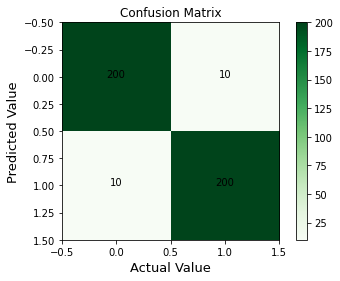

In [54]:
cm=confusion_matrix(y_true=test_labels,y_pred=prediction)
plt.imshow(cm,interpolation='nearest',cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel("Actual Value",fontsize='13')	#adds a label in the x axis
plt.ylabel("Predicted Value",fontsize='13')

thresh=cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(i,j,cm[i,j],horizontalalignment='center')

plt.colorbar()
plt.show()

#200+200 correct predictions, 20 wrong predictions
# accuracy=400/420=0.9523

# Evaluate

In [25]:
test_loss,test_accuracy=model.evaluate(scaled_test_samples,test_labels)
print("Accuracy is "+ str(test_accuracy))

14/14 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9524
Accuracy is 0.9523809552192688


#SAVE AND LOAD MODEL

This save function save:


*   architecture of model allowing to re-create the model
*   the weights of the model
*   training configuration(loss,optimizer)
*   the state of optimizer,allowing to resume training exactly where you left off



In [56]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [57]:
#save with extension h5
#add file to google drive by drag and drop
model.save('medical_trial_data.h5')

In [59]:
#LOAD

from keras.models import load_model
new_model=load_model('/content/gdrive/MyDrive/medical_trial_data.h5')

In [60]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [61]:
new_model.get_weights()

[array([[ 0.365,  0.677,  0.747, -0.521,  0.672,  0.693, -0.215, -0.534,
         -0.49 ,  0.73 ,  0.563,  0.272, -0.213, -0.46 ,  0.371, -0.594]],
       dtype=float32),
 array([-0.205, -0.379, -0.366,  0.   , -0.377, -0.388,  0.   ,  0.   ,
         0.   , -0.412,  0.1  ,  0.173,  0.   ,  0.   , -0.208,  0.   ],
       dtype=float32),
 array([[ 4.287e-01,  2.753e-01, -3.364e-01,  9.445e-02,  8.691e-02,
          1.590e-01,  4.718e-01, -7.934e-02, -1.129e+00,  2.089e-01,
         -1.731e+00, -2.242e-01,  2.589e-01,  1.045e+00, -5.740e-01,
          2.225e-01,  4.148e-01, -1.518e-01, -2.628e-02,  7.749e-02,
          3.529e-01, -1.332e+00, -1.626e-01, -9.703e-02,  3.595e-01,
         -6.160e-02, -1.767e+00, -1.196e+00, -1.651e+00, -5.201e-02,
         -1.906e+00, -5.801e-02],
        [ 5.081e-01,  4.633e-01, -3.524e-01, -3.818e-01,  2.025e-02,
          9.548e-02,  4.251e-01, -1.284e-01, -1.112e+00,  4.460e-02,
         -1.576e+00,  1.708e-01,  4.346e-01,  8.548e-01, -3.094e-01,
      

#MODEL TO JSON

if u want to save only architecture of model and not it's weights or its training configuration, you can use following function to save the architecture only.

So compiling and training has to be done again



In [62]:
json_string=model.to_json()

In [63]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [65]:
#model reconstruction from json
from keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [66]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
